# CSCI 5901 ASSIGNMENT 3 
## Submitted By:
#### Aakash Patel - B00807065
#### Rishabh Dhawan - B00826918


**Note:** 
1. This Ipynb should only be run on collab.
2. All shape files and AISData.csv must be uploaded prior to execution in the root collab directory.

In [325]:
!pip install geopandas
!pip install mapclassify

In [326]:
import geopandas as gpd
import numpy as np
import pandas as pd
from shapely.geometry import Point
import shapely
import missingno as msn
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

shdf = gpd.read_file("assignment3shapefile.shp")
shdf.head()
# Printing all polygons in shape file (ports)

,field_1,port_name,size,geometry
0,0,pointpolygon,0.0000,"POLYGON ((-63.59160304069519 44.6649292254607,..."
1,1,port1,0.0018,"POLYGON ((-63.569431 44.649993, -63.5694396674..."
2,2,port2,0.0018,"POLYGON ((-63.60949000000001 44.675853, -63.60..."
3,3,ind,0.0000,POLYGON ((-63.54742169380188 44.64697911403847...
4,4,port5,0.0018,"POLYGON ((-63.568048 44.663875, -63.5680566674..."


## Q1- Buffer creation with 1 kilometer radius with respect to Polygon Size in Shapefile(Nima_Ports.zip):
#### Here the AIS data.csv contain the actual port data from whom the shape file messages have been plotted in the following code.

In [0]:
#AIS Data
df=pd.read_csv('AISData.csv')
df.columns=['Unnamed: 0', 'event_time', 'lat',
       'long', 'position_accuracy', 'mmsi', 'sog', 'cog']
gdf = gpd.GeoDataFrame(df.drop(['lat', 'long'], axis=1),
crs={'init': 'epsg:4326'},
geometry=[shapely.geometry.Point(xy) for xy in zip(df.lat, df.long)])

Text(0.5, 1.0, 'AIS Messages from Vessels')

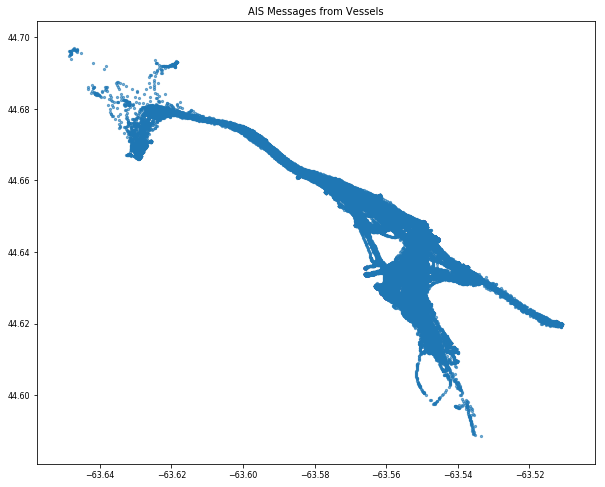

In [328]:
#plot shape file for messages
ax=gdf.plot(figsize=(10,10),alpha=0.6,markersize=5)
ax.set_title("AIS Messages from Vessels")

Text(0.5, 1.0, 'Ports graph before buffer creation')

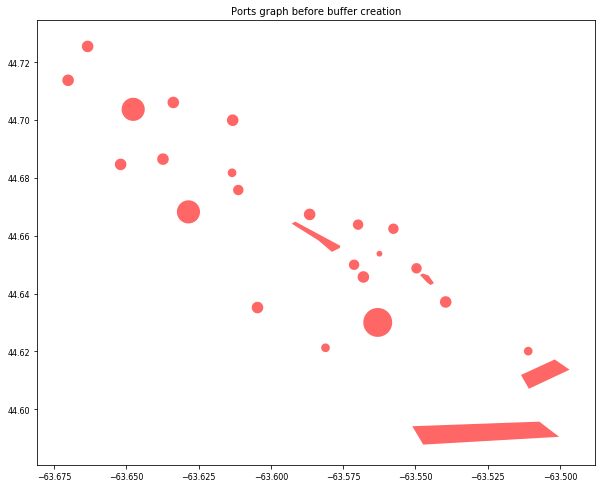

In [329]:
plt = shdf.plot(color="Red",figsize=(10,10),alpha=0.6)
plt.set_title("Ports graph before buffer creation")

0     POLYGON ((-63.59211224015373 44.66578987400187...
1     POLYGON ((-63.5684322045438 44.65004206767433,...
2     POLYGON ((-63.6084912045438 44.67590206767429,...
3     POLYGON ((-63.54790019975988 44.64785719834431...
4     POLYGON ((-63.56704920454379 44.66392406767437...
5     POLYGON ((-63.55482920454379 44.66250206767437...
6     POLYGON ((-63.5468442045438 44.64881206767429,...
7     POLYGON ((-63.50719250917987 44.59672292966286...
8     POLYGON ((-63.50849620454379 44.62015906767434...
9     POLYGON ((-63.55705320454381 44.63008906767429...
10    POLYGON ((-63.6307682045438 44.7061870676743, ...
11    POLYGON ((-63.61022620454379 44.70003706767433...
12    POLYGON ((-63.64264920454379 44.70380406767437...
13    POLYGON ((-63.62353120454381 44.66833706767428...
14    POLYGON ((-63.5836092045438 44.66745706767433,...
15    POLYGON ((-63.56501620454379 44.64582106767439...
16    POLYGON ((-63.60164820454379 44.63524106767434...
17    POLYGON ((-63.57861920454381 44.6213210676

Text(0.5, 1.0, 'Ports Graph with buffers')

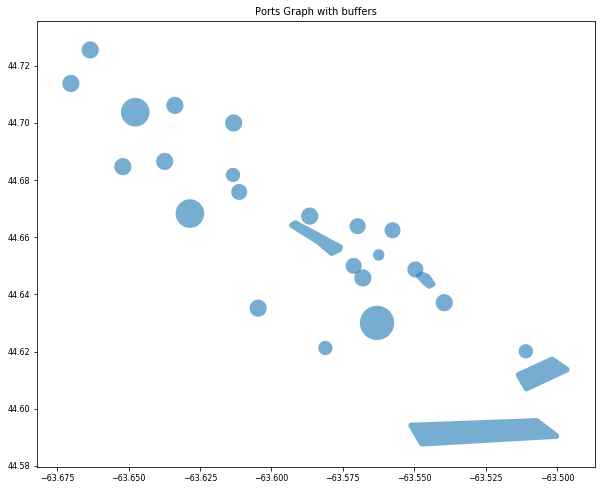

In [330]:
#Ports with 1 Km radius
bdf = shdf.buffer(0.001)
print(bdf)
plt = bdf.plot(figsize=(10,10),alpha=0.6)
plt.set_title("Ports Graph with buffers")

In [331]:
gdf.head()

,Unnamed: 0,event_time,position_accuracy,mmsi,sog,cog,geometry
0,0,2019-04-11T09:47:30.153Z,0.0,316013808,3.0,319.500000,POINT (-63.55608166666666 44.624835)
1,1,2019-04-11T09:47:27.273Z,0.0,316013808,3.0,320.700012,POINT (-63.55605333333333 44.62481666666667)
2,2,2019-04-11T09:47:34.340Z,0.0,316013808,2.9,319.500000,POINT (-63.55613833333334 44.62486833333333)
3,3,2019-04-11T09:47:37.087Z,0.0,316013808,3.0,319.799988,POINT (-63.55618666666667 44.62489833333333)
4,4,2019-04-19T09:52:19.358Z,0.0,316013808,3.2,337.200012,POINT (-63.55599833333334 44.62488333333334)


In [332]:
buffer_gdf=gpd.GeoDataFrame({"geometry":bdf})
buffer_gdf.head()

,geometry
0,POLYGON ((-63.59211224015373 44.66578987400187...
1,"POLYGON ((-63.5684322045438 44.65004206767433,..."
2,"POLYGON ((-63.6084912045438 44.67590206767429,..."
3,POLYGON ((-63.54790019975988 44.64785719834431...
4,POLYGON ((-63.56704920454379 44.66392406767437...


##  AIS messages and Port Intersection Plotting:
  #### In this section, we find the intersection of various messeges with respect to the associated port and store it in the form of a list.The intersection is then plotted according the intersection results that are true whenever any such overlapping is found among the ports and AIS messeges.

In [0]:
points=gdf['geometry']
buffers=buffer_gdf["geometry"]
msg_list = []

for point in points:
  flag_found='false'
  for buffer in buffers:
    
    if point.intersects(buffer):
      msg_list.append("intersects_true")
      flag_found="true"
      break
  
  if(flag_found=="false"):
    msg_list.append("intersects_false")


In [334]:
print(len(msg_list))
print(len(points))


766671
766671


In [0]:
gdf['intersection_results'] = msg_list

In [336]:
gdf.head()

,Unnamed: 0,event_time,position_accuracy,mmsi,sog,cog,geometry,intersection_results
0,0,2019-04-11T09:47:30.153Z,0.0,316013808,3.0,319.500000,POINT (-63.55608166666666 44.624835),intersects_false
1,1,2019-04-11T09:47:27.273Z,0.0,316013808,3.0,320.700012,POINT (-63.55605333333333 44.62481666666667),intersects_false
2,2,2019-04-11T09:47:34.340Z,0.0,316013808,2.9,319.500000,POINT (-63.55613833333334 44.62486833333333),intersects_false
3,3,2019-04-11T09:47:37.087Z,0.0,316013808,3.0,319.799988,POINT (-63.55618666666667 44.62489833333333),intersects_false
4,4,2019-04-19T09:52:19.358Z,0.0,316013808,3.2,337.200012,POINT (-63.55599833333334 44.62488333333334),intersects_false


Text(0.5, 1.0, 'Intersection Graph')

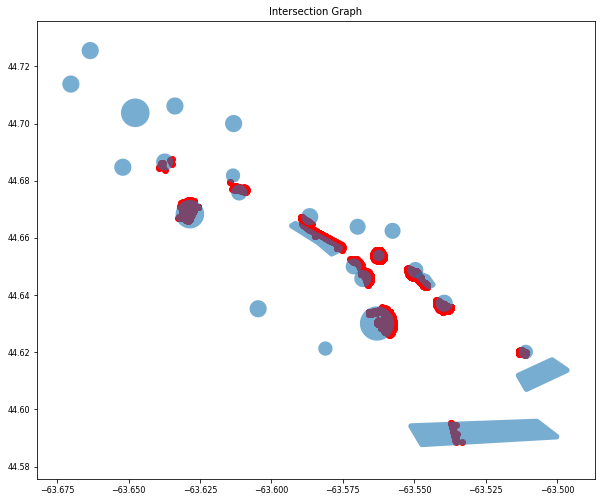

In [337]:
intersect_df = gdf[gdf['intersection_results']=='intersects_true']
ax = intersect_df.plot(color="Red",figsize=(10,10))
ax = buffers.plot(ax=ax, figsize=(10,10),alpha=0.6)
ax.set_title("Intersection Graph")

## Q2-AIS message density Color Mapping:
#### Once the intersection is plotted among the messeges and the ports, we intend to find the density of messeges (number of messegses on each port). This depiction has been better implemented using a colour coded plot

In [0]:
freq_list = []

for i in range(len(buffers)):
  freq_list.append(0)
  
for point in points:
  count=0
  for buffer in buffers:
    
    if point.intersects(buffer):
      freq_list[count]+=1
    
    count+=1

In [0]:
density_buffer_gdf=gpd.GeoDataFrame({"geometry":buffers})
density_buffer_gdf['density']=freq_list

In [340]:
!pip install plotly

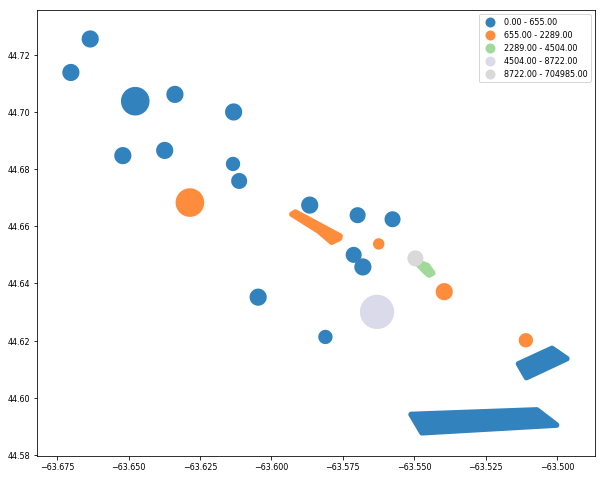

In [341]:
import matplotlib.pyplot as plt
density_buffer_gdf.plot(column='density',legend=True, cmap='tab20c', scheme='naturalbreaks', figsize=(10,10))

## Q3- Splitting AIS data into hourly intervals:
#### The third question proceeds by dividing the AISdata into the dataframes of time interval of one hour|

In [0]:
events=gdf['event_time']
eventhours = []
for event in events:
  eventhours.append(int(event[11:13]))
gdf['event_hours']=eventhours

In [343]:
gdf.head()

,Unnamed: 0,event_time,position_accuracy,mmsi,sog,cog,geometry,intersection_results,event_hours
0,0,2019-04-11T09:47:30.153Z,0.0,316013808,3.0,319.500000,POINT (-63.55608166666666 44.624835),intersects_false,9
1,1,2019-04-11T09:47:27.273Z,0.0,316013808,3.0,320.700012,POINT (-63.55605333333333 44.62481666666667),intersects_false,9
2,2,2019-04-11T09:47:34.340Z,0.0,316013808,2.9,319.500000,POINT (-63.55613833333334 44.62486833333333),intersects_false,9
3,3,2019-04-11T09:47:37.087Z,0.0,316013808,3.0,319.799988,POINT (-63.55618666666667 44.62489833333333),intersects_false,9
4,4,2019-04-19T09:52:19.358Z,0.0,316013808,3.2,337.200012,POINT (-63.55599833333334 44.62488333333334),intersects_false,9


#### Here we have displayed an empty buffer density table for the conveinience of showing how it is populated by the respective density values.

In [344]:
# Adding port information to buffer data frame
buffer_gdf['port_name']=shdf['port_name']

# Logic to create empty interval columns for intervals
temp=[]
j=1
for j in range(len(buffer_gdf['geometry'])):
  temp.append(0)

for i in range(24):
  col_str = "hour_"+ str(i)
  buffer_gdf[col_str]=temp
  
buffer_gdf.head()

,geometry,port_name,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,POLYGON ((-63.59211224015373 44.66578987400187...,pointpolygon,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"POLYGON ((-63.5684322045438 44.65004206767433,...",port1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"POLYGON ((-63.6084912045438 44.67590206767429,...",port2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,POLYGON ((-63.54790019975988 44.64785719834431...,ind,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,POLYGON ((-63.56704920454379 44.66392406767437...,port5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Here we display the buffer data frame with interval based message densities.

In [345]:
gdf_inter= gdf[gdf['intersection_results']=='intersects_true']
gdf_inter['intersected_port']=""

for index,row in gdf_inter.iterrows():
  point = row['geometry']
  hr = row['event_hours']
  hr_str = 'hour_'+ str(hr)
  for ind, ro in buffer_gdf.iterrows():
    buffer=ro['geometry'] 
    port=ro['port_name']
    if point.intersects(buffer):
      buffer_gdf.at[ind, hr_str]+=1
      gdf_inter.at[index,'intersected_port']=str(port)
      break

# Buffer Data frame with interval message densities      
buffer_gdf      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,geometry,port_name,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,POLYGON ((-63.59211224015373 44.66578987400187...,pointpolygon,7,29,9,0,37,5,0,28,6,90,2,272,42,18,231,157,0,0,0,63,47,41,0,10
1,"POLYGON ((-63.5684322045438 44.65004206767433,...",port1,0,15,0,0,0,0,0,0,7,0,0,16,0,0,42,0,0,0,0,0,0,0,0,0
2,"POLYGON ((-63.6084912045438 44.67590206767429,...",port2,10,8,0,2,5,2,5,1,0,33,18,3,10,14,33,12,18,5,2,12,11,8,3,14
3,POLYGON ((-63.54790019975988 44.64785719834431...,ind,472,0,4,57,568,234,155,270,189,192,183,196,0,161,222,1,155,477,494,124,0,24,247,79
4,POLYGON ((-63.56704920454379 44.66392406767437...,port5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,POLYGON ((-63.55482920454379 44.66250206767437...,port6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,"POLYGON ((-63.5468442045438 44.64881206767429,...",port7,29569,29983,30939,31810,31293,31560,31121,30339,27669,21673,23597,29960,30969,29308,29349,29093,30261,30484,30252,26507,25203,28611,32918,32145
7,POLYGON ((-63.50719250917987 44.59672292966286...,south_enterance,0,25,2,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,13,2,0,0,0
8,POLYGON ((-63.50849620454379 44.62015906767434...,auto_port,195,13,0,0,0,0,0,0,0,250,231,0,0,18,158,84,28,120,127,616,301,47,4,23
9,POLYGON ((-63.55705320454381 44.63008906767429...,southend container terminal,418,443,494,116,0,46,234,67,296,786,2252,598,0,279,453,210,217,0,114,426,761,493,19,0


In [0]:
col_values=[]
for index,row in buffer_gdf.iterrows():
  sum=0
  for i in range(24):
    hour_str='hour_'+str(i)
    sum= sum+row[hour_str]
  col_values.append(sum)
  
buffer_gdf['total_density']=col_values

In [347]:
buffer_gdf.total_density


0       1094
1         80
2        229
3       4504
4          0
5          0
6     704613
7         44
8       2215
9       8722
10         0
11         0
12         0
13      1552
14       655
15       448
16         0
17         0
18         0
19      2289
20         2
21       995
22         0
23         0
24         0
25        14
Name: total_density, dtype: int64

In [0]:
from google.colab import files

def plotMessageDensityForInterval(geo_df, buff_df, hour):
  hour_col="hour_"+str(hour)
  ax = buff_df.plot(column=hour_col,legend=True,scheme='naturalbreaks',figsize=(10,10))
  ax.set_title("Message density port wise between "+str(hour)+" - "+ str(hour+1)+" hours")
  fileName = "Message density_"+str(hour)+".png"
  ax.figure.savefig(fileName)
  files.download(fileName)

### Port - Buffers and Message Intersection
Proceeding as in parts 1 and 2 we again find the existential intersections. But only in this case the buffer will contain the one interval wise set data whose coincidence is plotted multiple times

In [0]:
# For plotting Message intersection on ports for provided interval
def intervalMessageIntersectionPlotter(hour):
  subgdf = gdf_inter[gdf_inter['event_hours']==hour]
  ax =subgdf.plot(figsize=(10,10), color="blue")
  ax.set_title("Ports - Message intersections for interval "+str(hour)+" to "+ str(hour+1))
  buffer_gdf.plot(ax=ax, color='red', alpha=0.6)
  fileName = "Ports_Message_Intersections_interval_"+str(hour)+".png"
  ax.figure.savefig(fileName)
  files.download(fileName)

# For plotting Message intersection on ports for provided interval
def intervalMessageDensityPlotter(hour):
  hour_col='hour_'+str(hour)
  hr_gdf=buffer_gdf[['geometry',hour_col]]
  ax=hr_gdf.plot(column=hour_col,legend=True, cmap='tab20c', scheme='quantiles', figsize=(10,10))
  ax.set_title("Ports - Message density for interval "+str(hour)+" to "+ str(hour+1))
  fileName = "Ports_Message_Density_interval_"+str(hour)+".png"
  ax.figure.savefig(fileName)
  files.download(fileName)

## Interval wise Intersection and Density plots of Vessel Messages at Ports
#### Here all the various plots are generated and we are saving(downloading) them in the local system directory and also on the google colab root directory for the convinience to visualise them.

**Note**: It also saves plots in the root directory of colab.


### Following Code cell fails sometimes due to network issues. Please re-run the cell to resolve. Sucessful run is shown inline in proceeding cell outputs.

Note: The pdf document contains the successfully executed outputs.

/usr/local/lib/python3.6/dist-packages/mapclassify/classifiers.py:138: UserWarning: Warning: Not enough unique values in array to form k classes
  "Warning: Not enough unique values in array to form k classes", UserWarning
/usr/local/lib/python3.6/dist-packages/mapclassify/classifiers.py:140: UserWarning: Warning: setting k to 3
  Warn("Warning: setting k to %d" % k_q, UserWarning)
/usr/local/lib/python3.6/dist-packages/mapclassify/classifiers.py:140: UserWarning: Warning: setting k to 4
  Warn("Warning: setting k to %d" % k_q, UserWarning)
/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


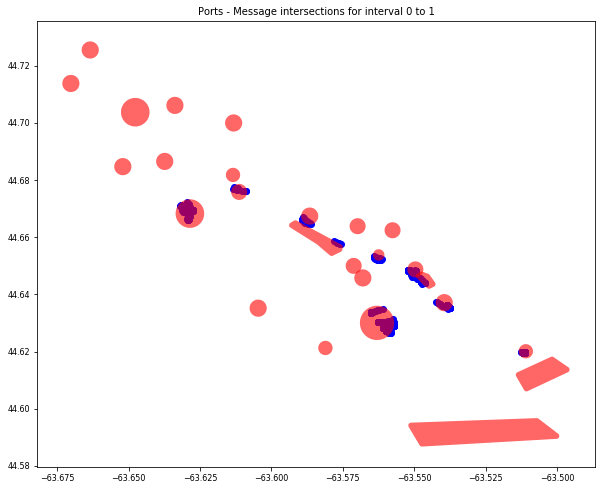

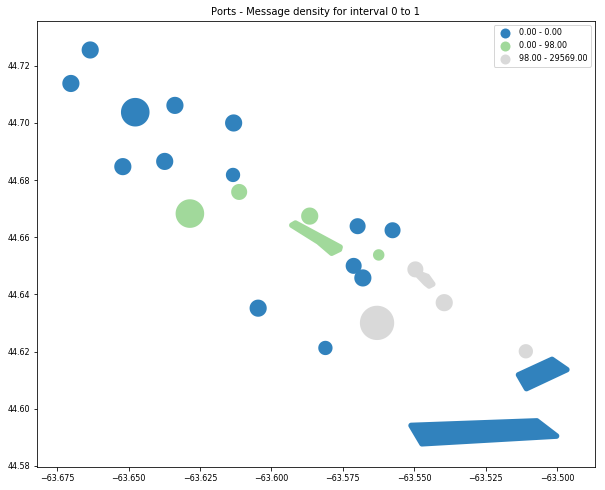

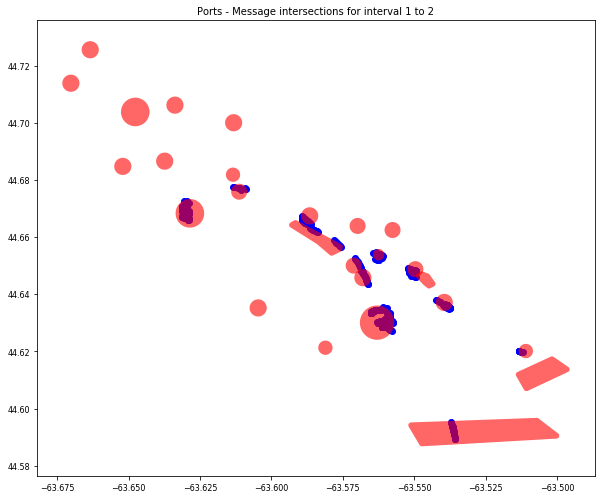

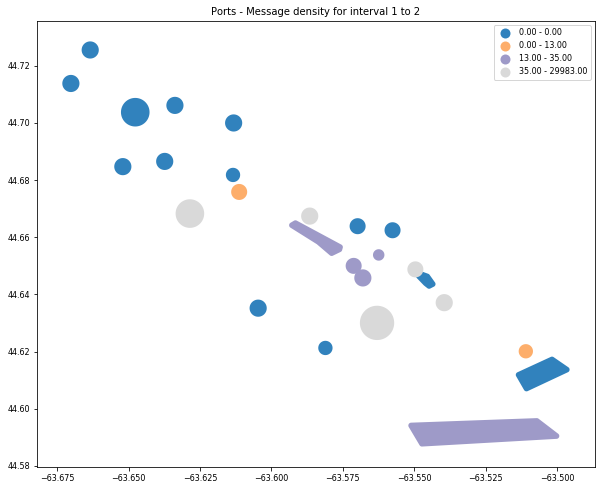

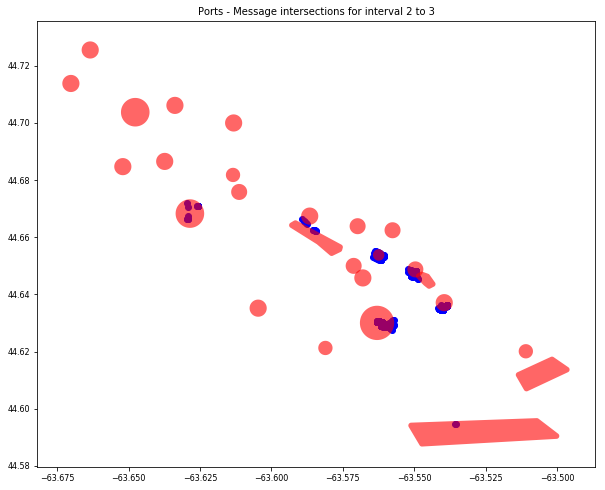

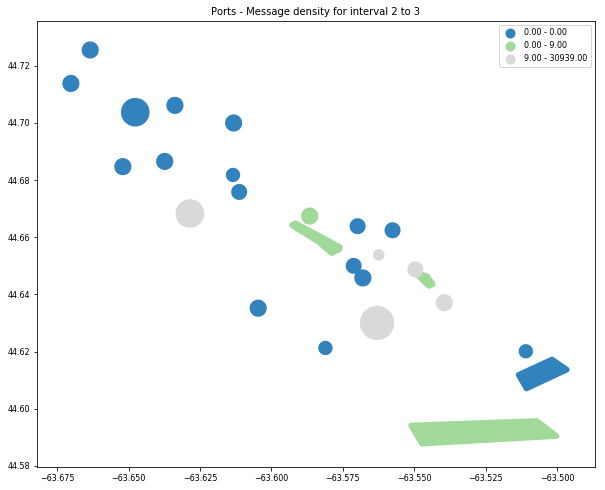

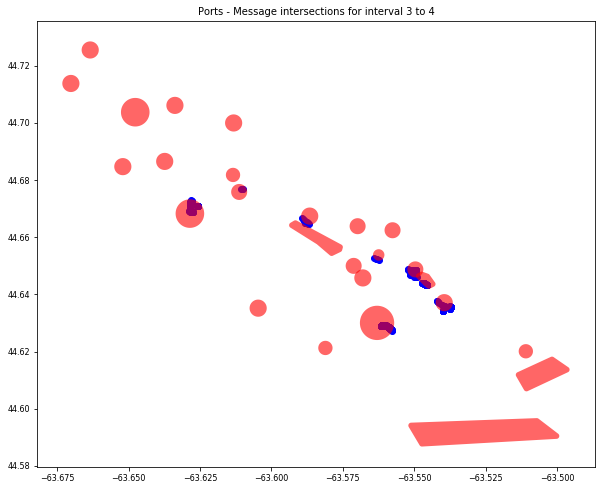

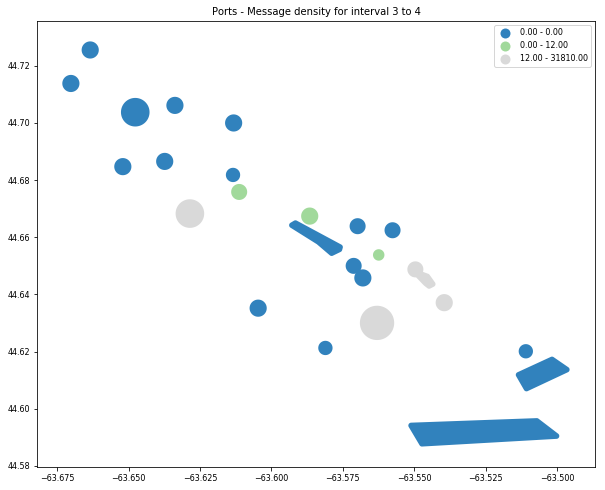

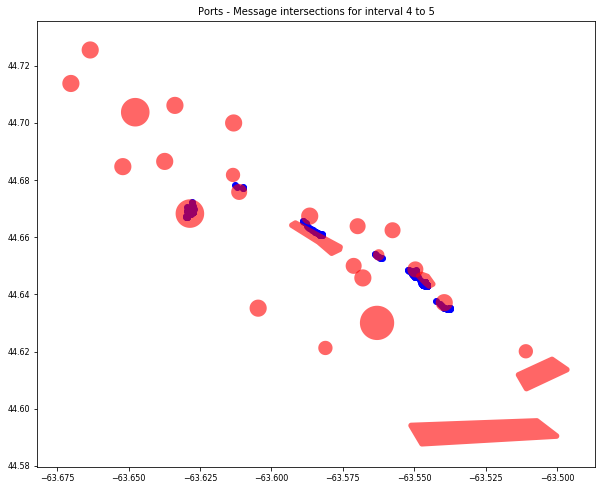

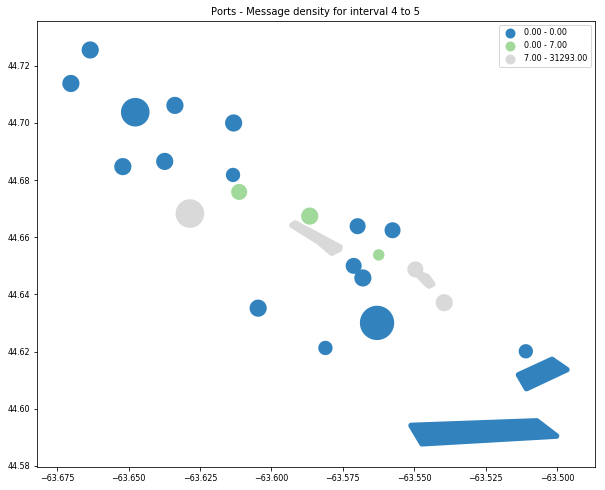

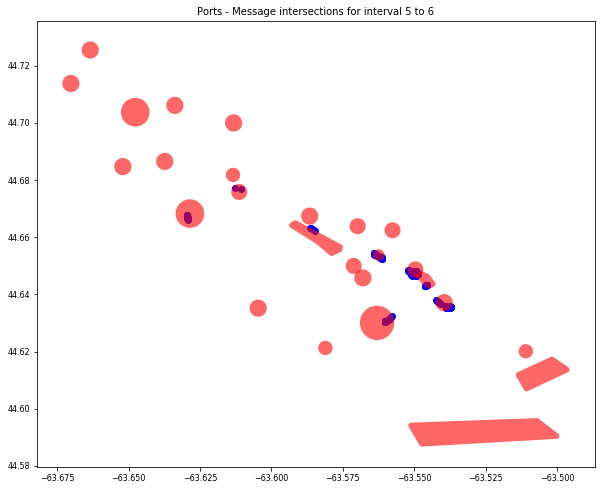

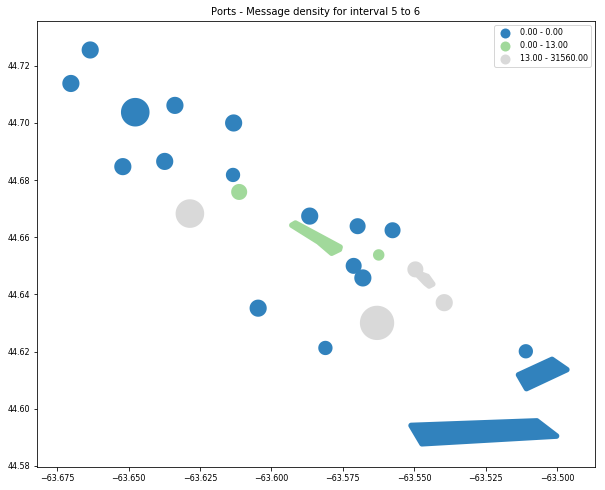

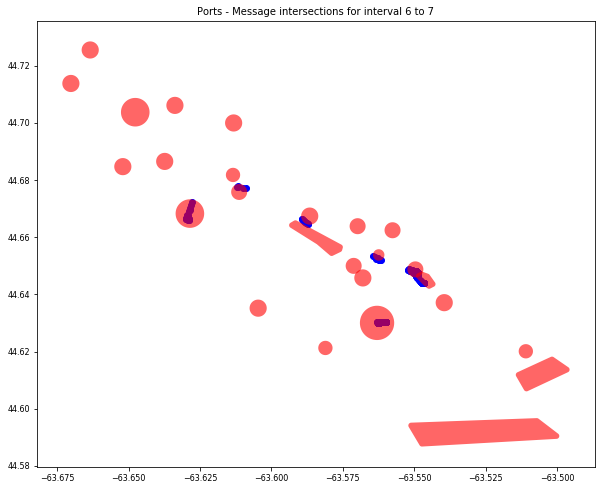

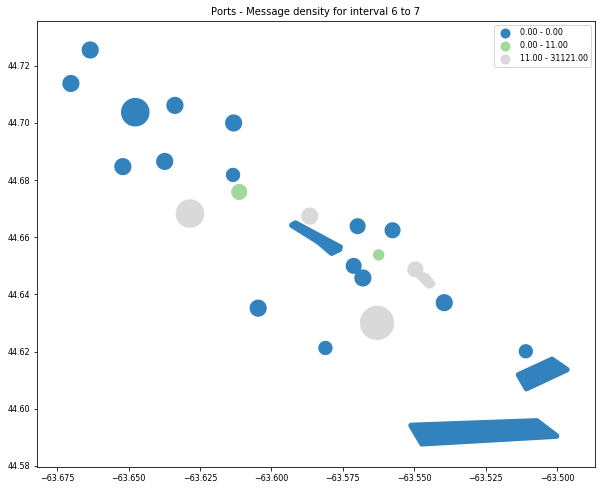

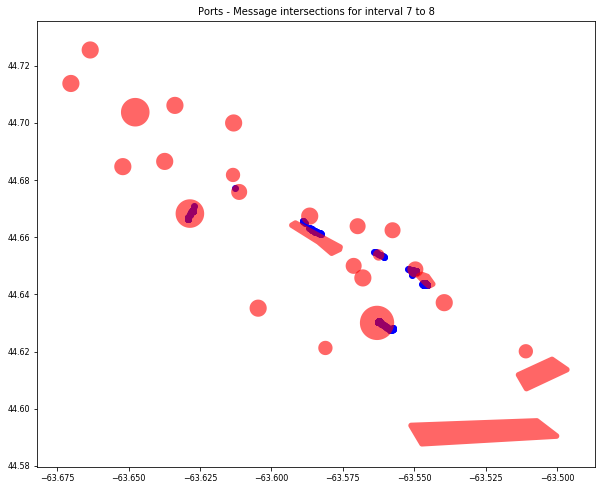

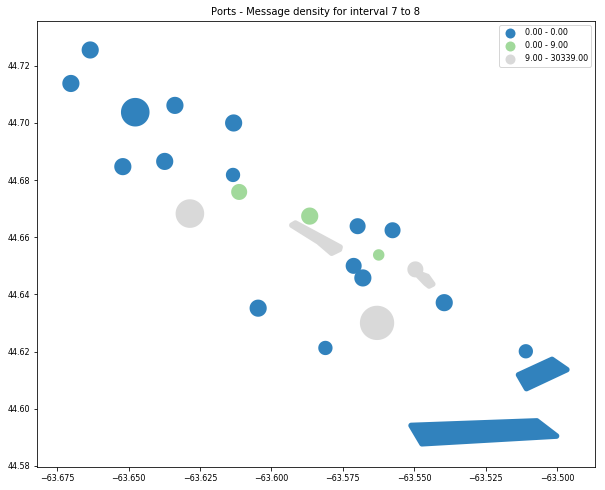

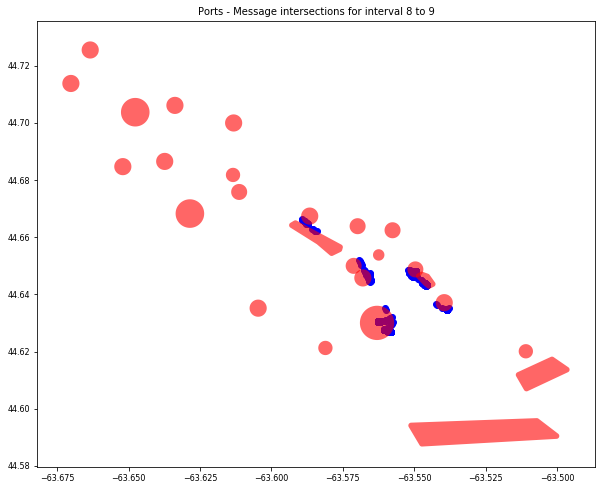

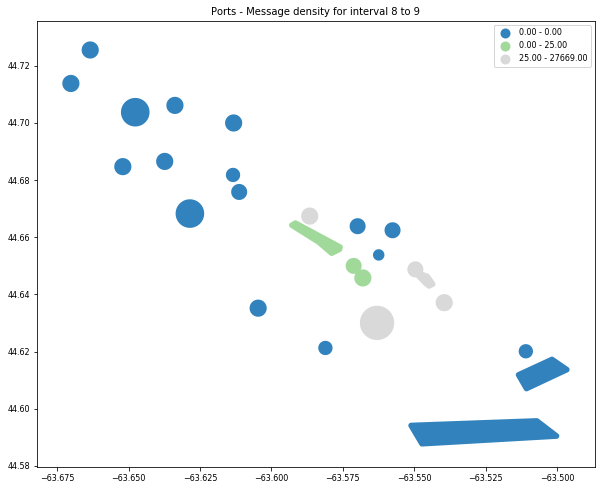

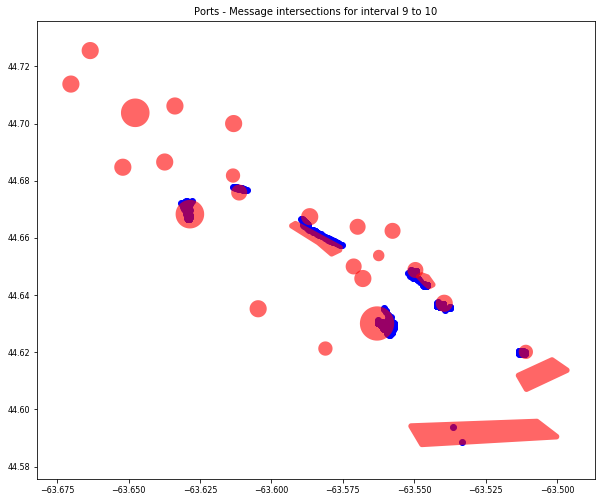

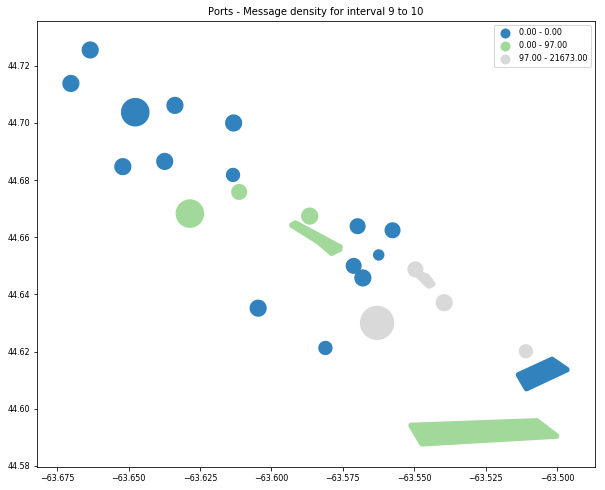

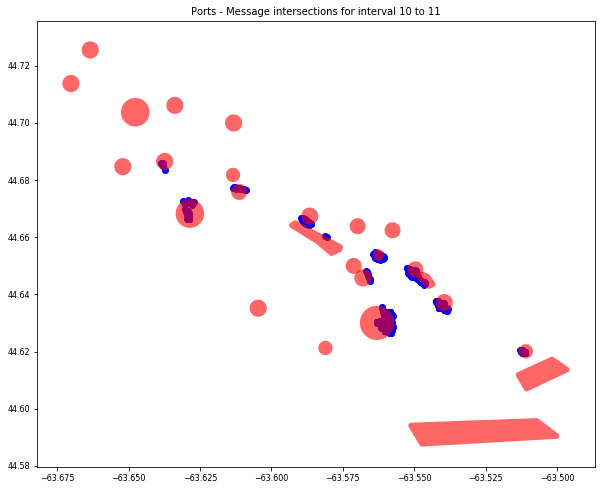

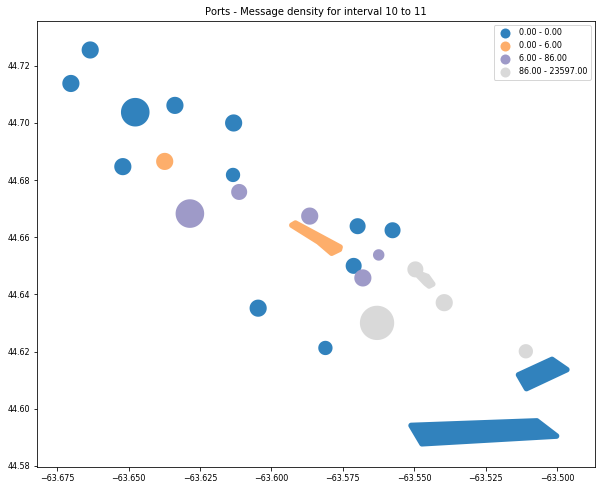

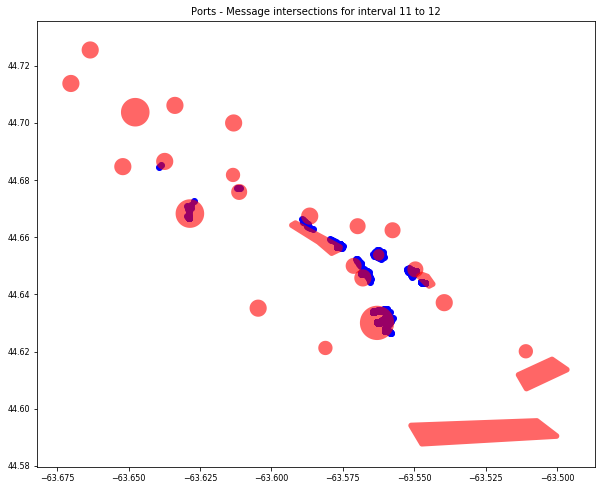

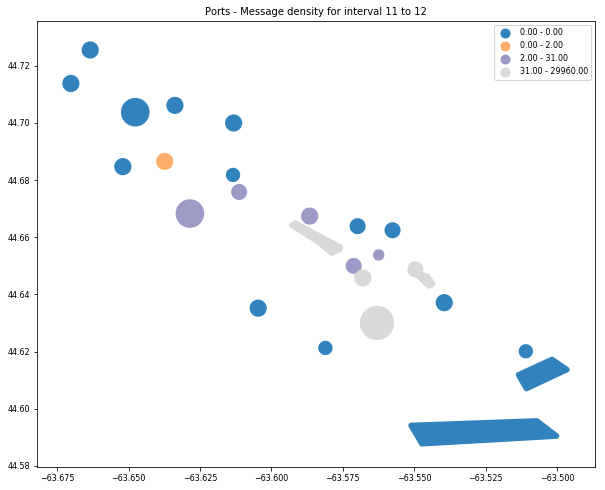

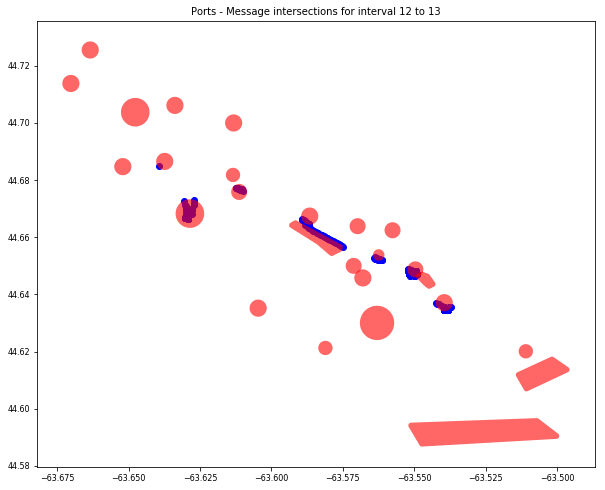

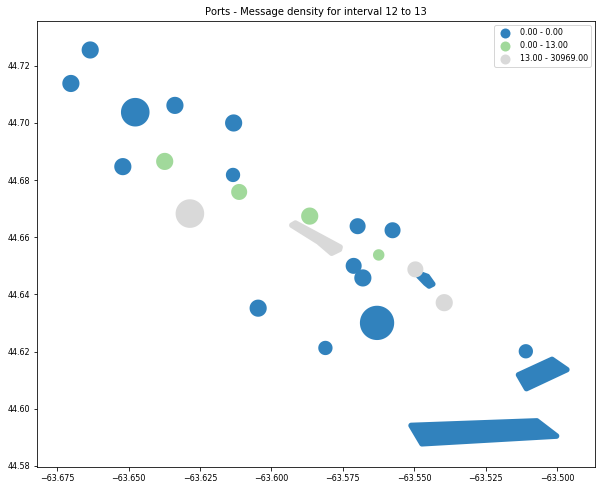

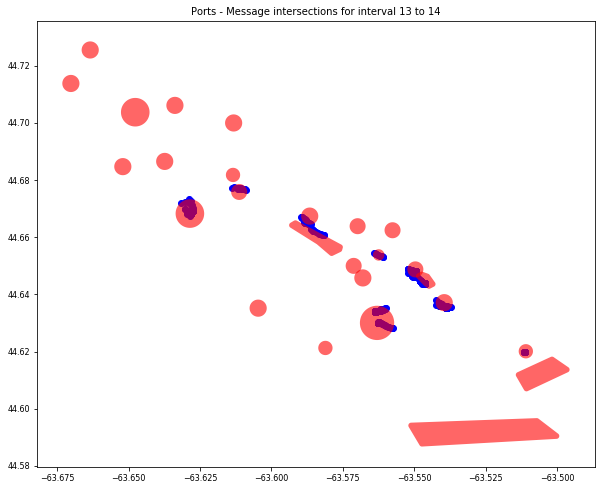

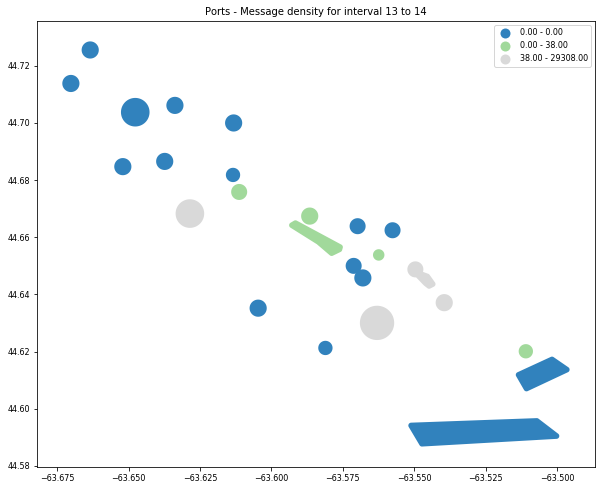

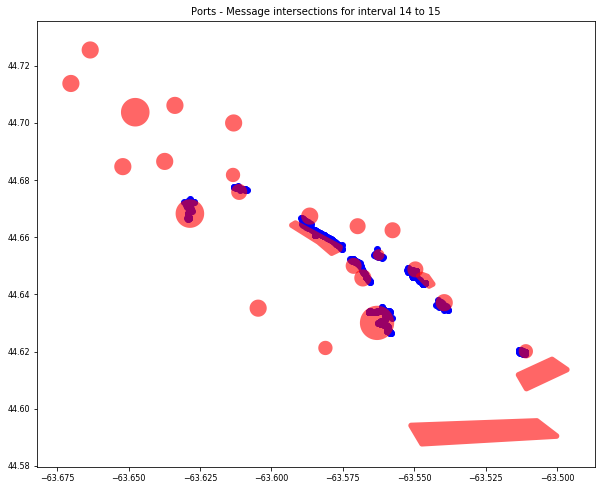

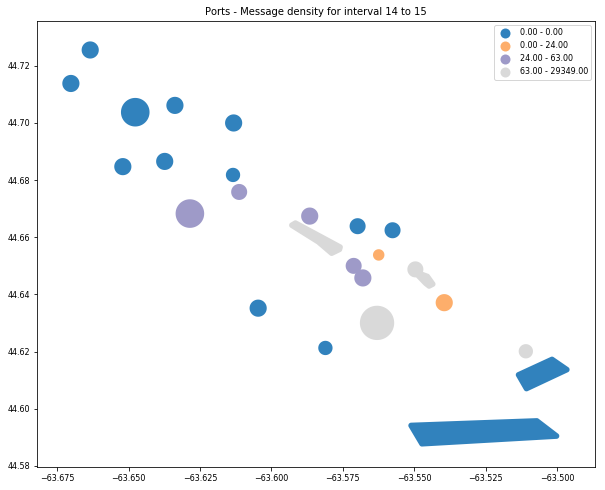

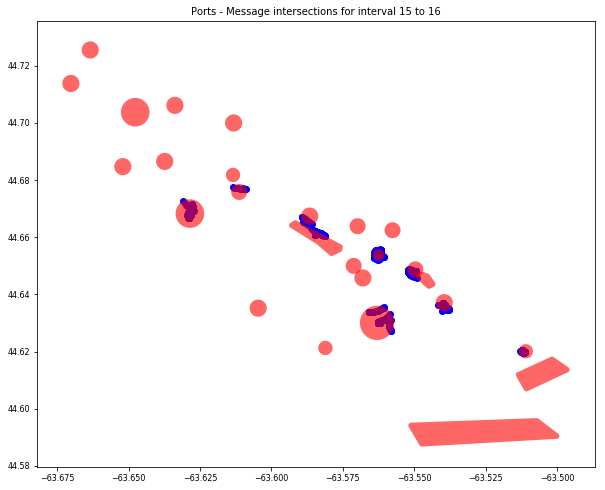

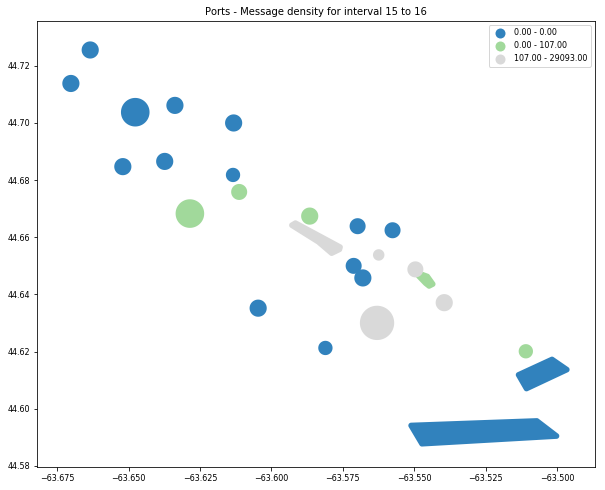

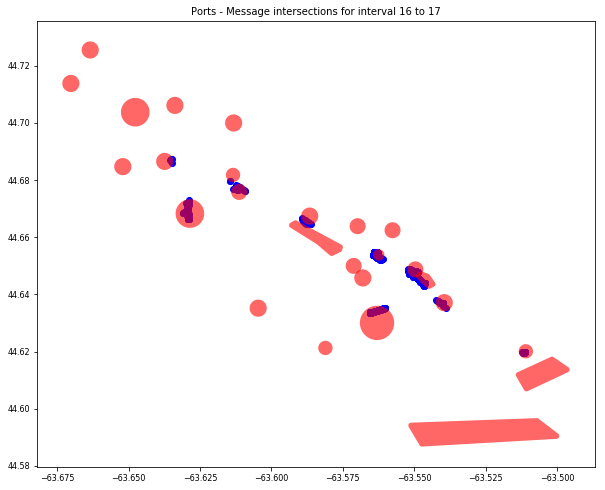

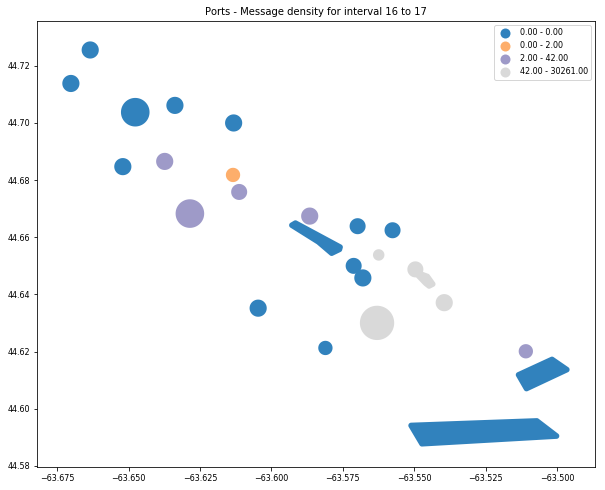

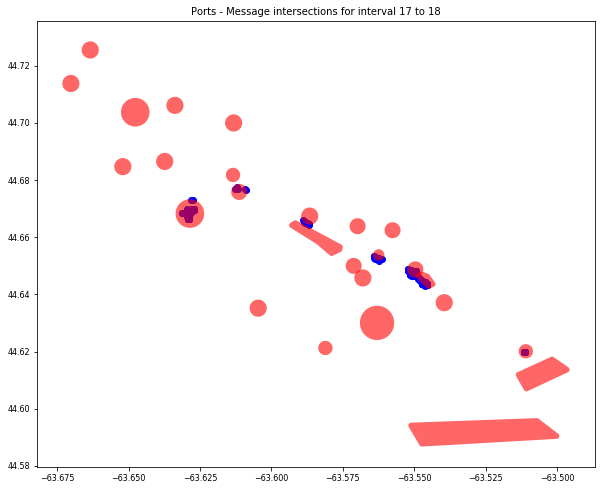

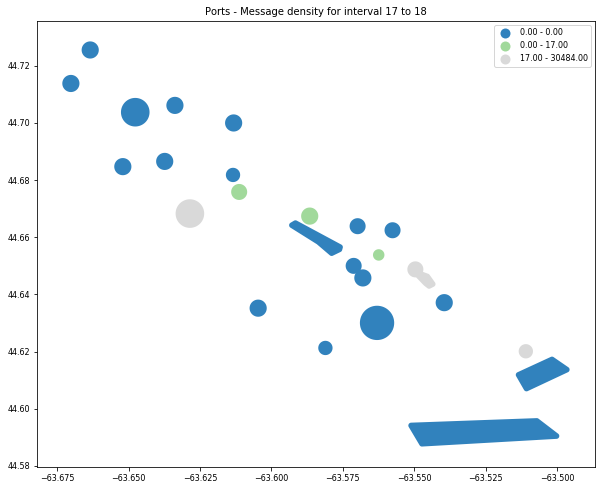

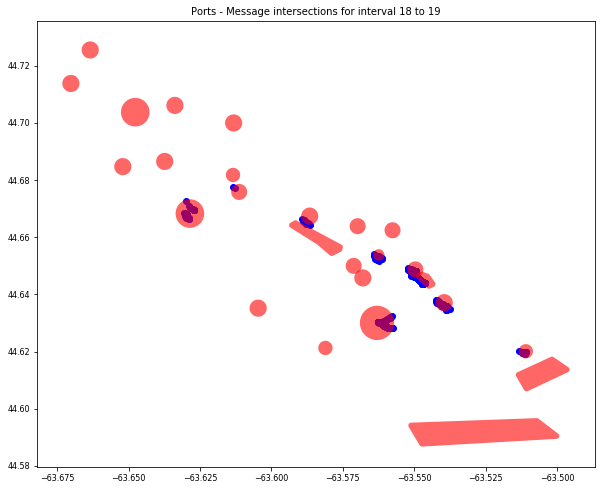

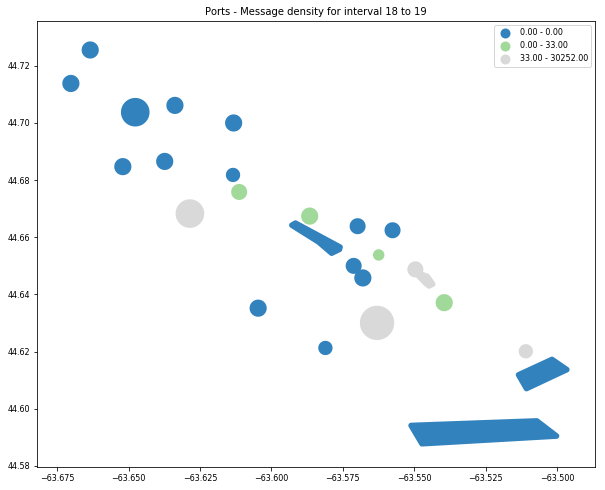

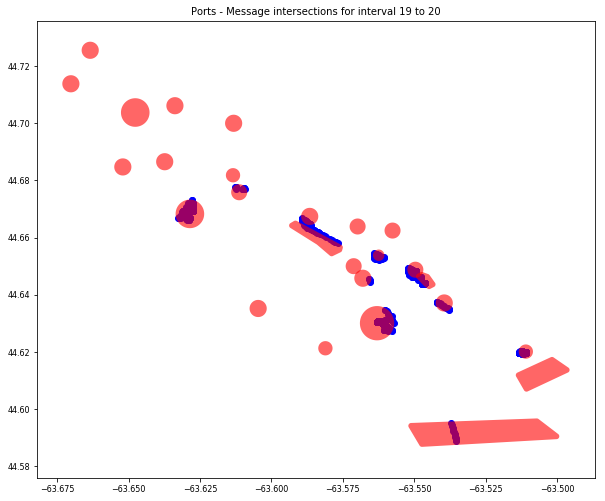

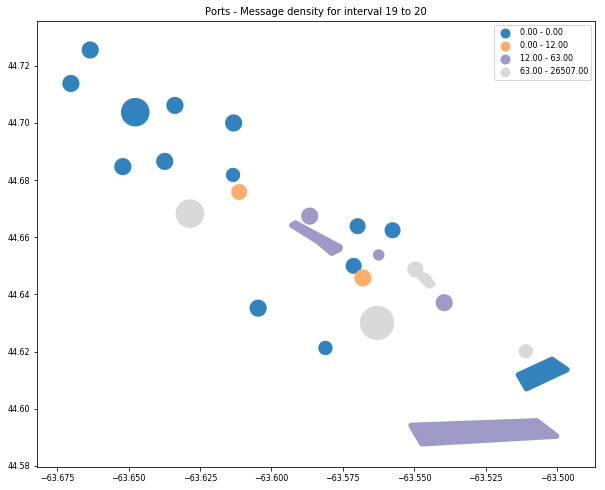

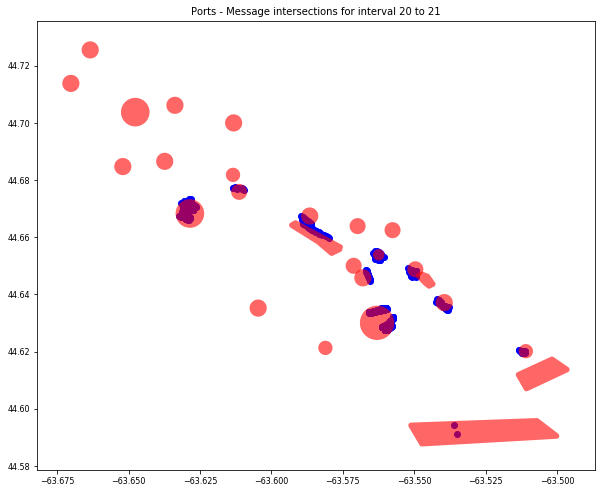

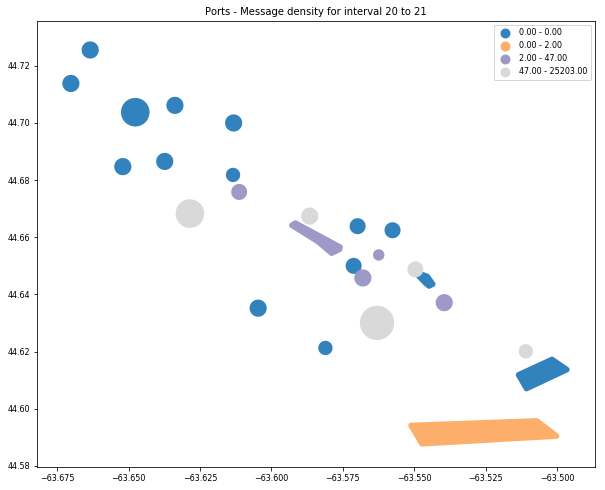

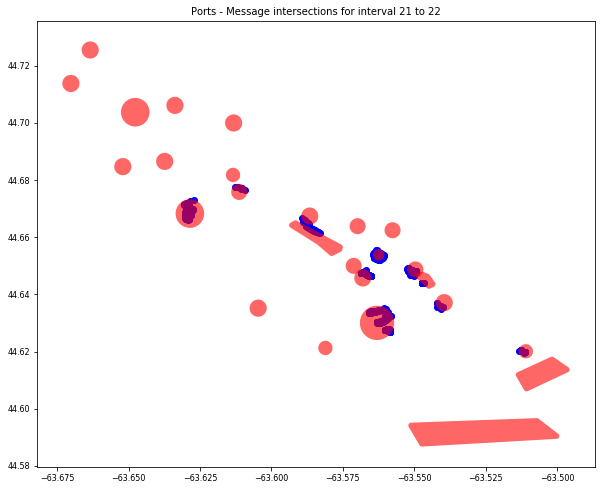

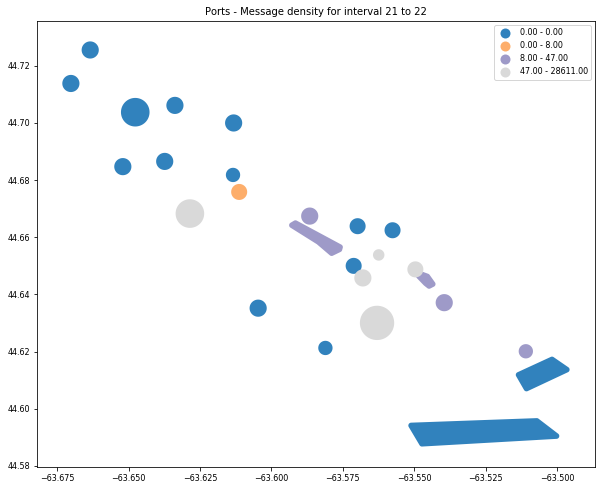

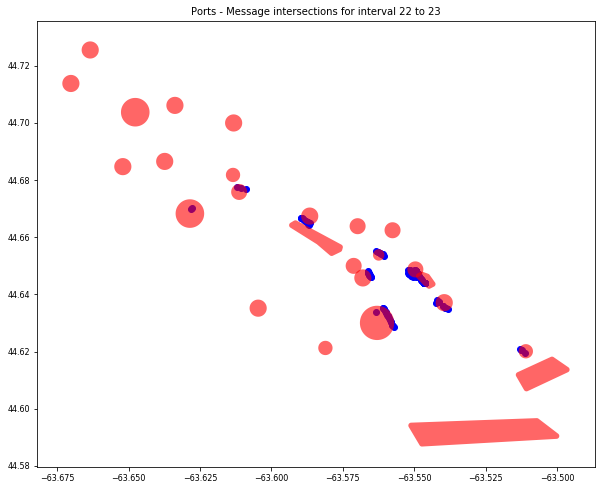

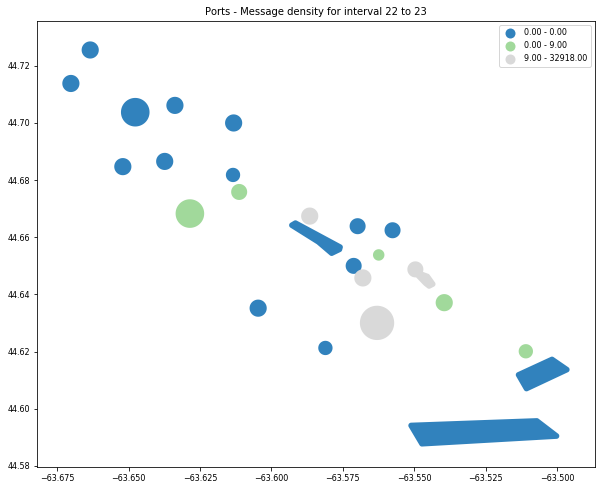

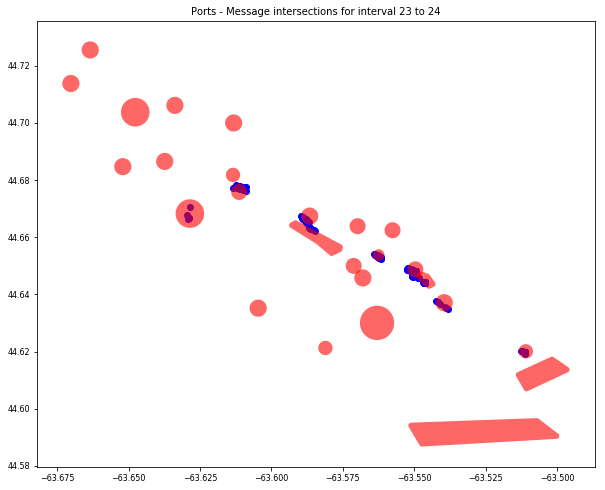

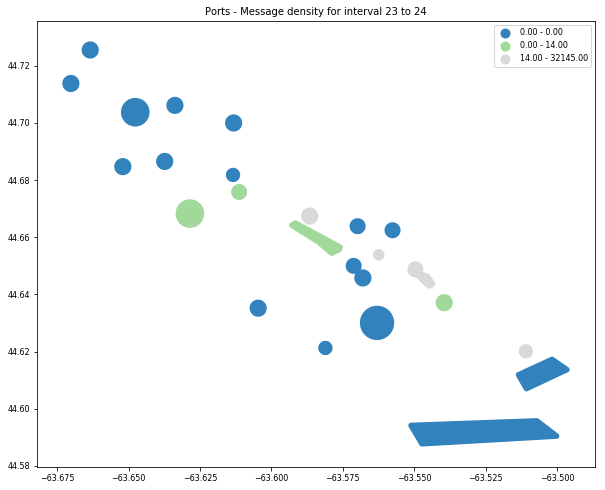

In [351]:
for hour in range(24):
  intervalMessageIntersectionPlotter(hour)
  intervalMessageDensityPlotter(hour)
  
  

## Q4-Temporal Chart for Message Density of a Port:
In this we select a random port and create a temporal chart of the message densities of them. Eventually we then plot them in the form of a bar graph between port density at a particular hour(Y-axis) vs time(x-axis).

In [352]:
# To find ports with message density greater than zero.
buffer_gdf[buffer_gdf['total_density']>0]

,geometry,port_name,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,total_density
0,POLYGON ((-63.59211224015373 44.66578987400187...,pointpolygon,7,29,9,0,37,5,0,28,6,90,2,272,42,18,231,157,0,0,0,63,47,41,0,10,1094
1,"POLYGON ((-63.5684322045438 44.65004206767433,...",port1,0,15,0,0,0,0,0,0,7,0,0,16,0,0,42,0,0,0,0,0,0,0,0,0,80
2,"POLYGON ((-63.6084912045438 44.67590206767429,...",port2,10,8,0,2,5,2,5,1,0,33,18,3,10,14,33,12,18,5,2,12,11,8,3,14,229
3,POLYGON ((-63.54790019975988 44.64785719834431...,ind,472,0,4,57,568,234,155,270,189,192,183,196,0,161,222,1,155,477,494,124,0,24,247,79,4504
6,"POLYGON ((-63.5468442045438 44.64881206767429,...",port7,29569,29983,30939,31810,31293,31560,31121,30339,27669,21673,23597,29960,30969,29308,29349,29093,30261,30484,30252,26507,25203,28611,32918,32145,704613
7,POLYGON ((-63.50719250917987 44.59672292966286...,south_enterance,0,25,2,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,13,2,0,0,0,44
8,POLYGON ((-63.50849620454379 44.62015906767434...,auto_port,195,13,0,0,0,0,0,0,0,250,231,0,0,18,158,84,28,120,127,616,301,47,4,23,2215
9,POLYGON ((-63.55705320454381 44.63008906767429...,southend container terminal,418,443,494,116,0,46,234,67,296,786,2252,598,0,279,453,210,217,0,114,426,761,493,19,0,8722
13,POLYGON ((-63.62353120454381 44.66833706767428...,Fairview cove,98,61,29,54,67,42,30,41,0,97,80,31,69,56,63,107,42,71,47,123,214,122,2,6,1552
14,"POLYGON ((-63.5836092045438 44.66745706767433,...",armament,25,41,6,12,4,0,12,5,26,56,86,17,13,38,50,30,26,17,14,54,60,30,16,17,655


Text(0, 0.5, 'Messages received in each interval')

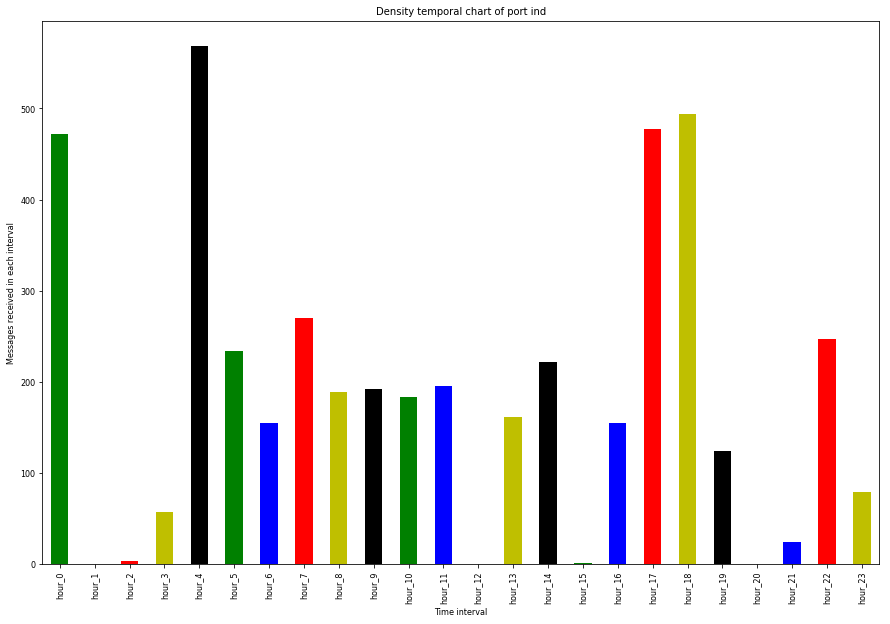

In [353]:
# Selected random port with non-zero count of total messages.
port_df = buffer_gdf[buffer_gdf['port_name']=='ind']
temp=port_df.set_index("port_name")
temp = temp.loc["ind"][1:25]
ax=temp.plot(kind="bar",figsize=(15,10),color=tuple(["g","b","r","y","k"]),width=0.5)
ax.set_title('Density temporal chart of port '+ 'ind')
ax.set_xlabel('Time interval')
ax.set_ylabel('Messages received in each interval')  


## Q5. Implementing Drift Methods

In [354]:
temp

hour_0     472
hour_1       0
hour_2       4
hour_3      57
hour_4     568
hour_5     234
hour_6     155
hour_7     270
hour_8     189
hour_9     192
hour_10    183
hour_11    196
hour_12      0
hour_13    161
hour_14    222
hour_15      1
hour_16    155
hour_17    477
hour_18    494
hour_19    124
hour_20      0
hour_21     24
hour_22    247
hour_23     79
Name: ind, dtype: object

Text(0, 0.5, 'Messages received in each interval')

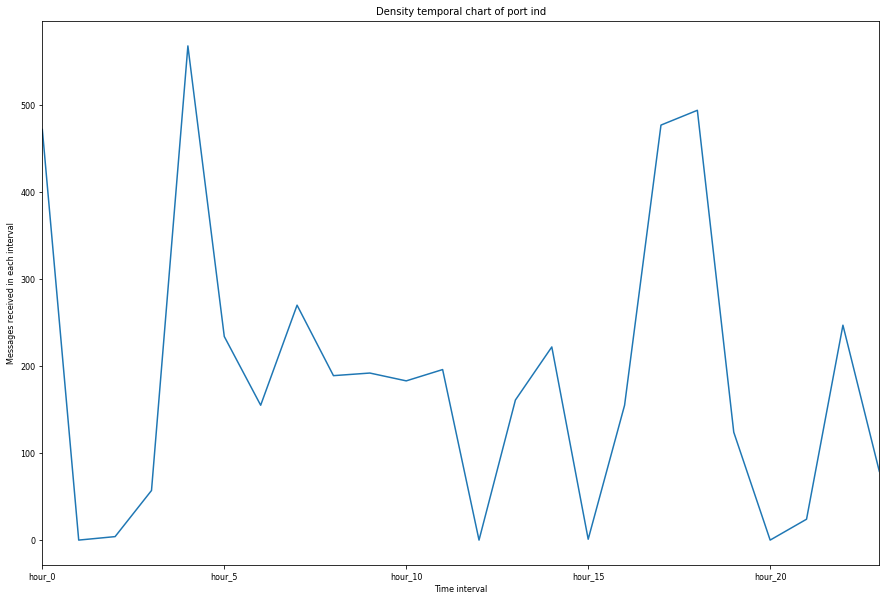

In [355]:
port_df = buffer_gdf[buffer_gdf['port_name']=='ind']
temp=port_df.set_index("port_name")
temp = temp.loc["ind"][1:25]
ax=temp.plot(kind='line',figsize=(15,10))
ax.set_title('Density temporal chart of port '+ 'ind')
ax.set_xlabel('Time interval')
ax.set_ylabel('Messages received in each interval')

### Insight from the Drift Analysis: 
 #### Concurring from the drift analogy, it can be inferred that drift slopes have been highest the hour 0 to 5 and hour 15 to 20 with respect to the current bufffer frame. Exploring deeper into the data from the messages received from these ports, this drift can relate to a number of factors like the zones where the vessel has been visiting more frequently(this data can be referenced from the position coordinates) and even due to certain areas where the number of messeges are terminally higher. Hence, this is clear that the drift will be highest wherever the chances of occurence of both of these factors will be highest or in other words the areas of coincidence of the vessel ports with AIS messages.

In [356]:
try:
    import skmultiflow
    print("installed")
except:
    !pip install -U git+https://github.com/scikit-multiflow/scikit-multiflow

installed


### Interval based drift analysis:


Text(0, 0.5, 'Message Density')

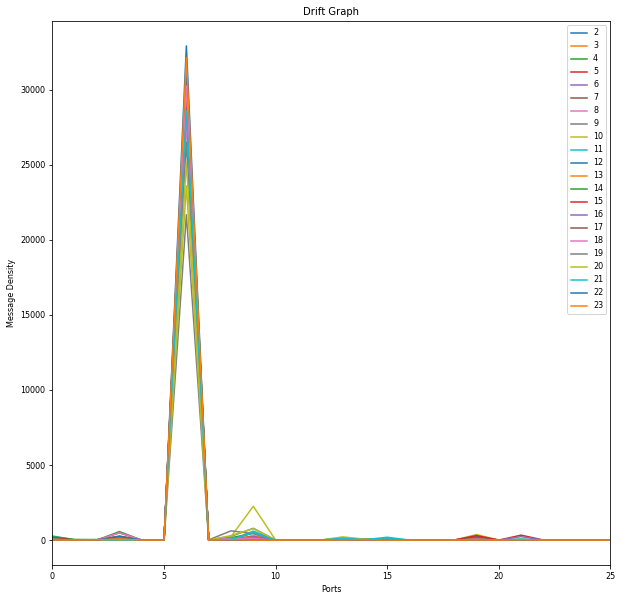

In [357]:
stream =buffer_gdf.iloc[:,2:26].values
s_df = pd.DataFrame(stream)
s_df.iloc[:,2:].plot(figsize=(10,10))
plt.title("Drift Graph")
plt.legend()
plt.xlabel("Ports")
plt.ylabel("Message Density")


 #### Also, analysing with respect to the port number of various vessels, it can be inferred that ' port7 '  shows the highest traffic of messeges(message density). This again correlates to the above metioned factors which configure the number of messeges being received and therfore explains the obtained results value. however , here it must be noted that we have considered a particular instance where the messege density is highest. So, the results considering the entire data given for the ports are subjective to change the results depending on their magnitude of affect.

In [358]:
# stream_df = port_df.iloc[:,2:26]
# stream_df = buffer_gdf.iloc[:,2:26]
buffer_gdf

,geometry,port_name,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,total_density
0,POLYGON ((-63.59211224015373 44.66578987400187...,pointpolygon,7,29,9,0,37,5,0,28,6,90,2,272,42,18,231,157,0,0,0,63,47,41,0,10,1094
1,"POLYGON ((-63.5684322045438 44.65004206767433,...",port1,0,15,0,0,0,0,0,0,7,0,0,16,0,0,42,0,0,0,0,0,0,0,0,0,80
2,"POLYGON ((-63.6084912045438 44.67590206767429,...",port2,10,8,0,2,5,2,5,1,0,33,18,3,10,14,33,12,18,5,2,12,11,8,3,14,229
3,POLYGON ((-63.54790019975988 44.64785719834431...,ind,472,0,4,57,568,234,155,270,189,192,183,196,0,161,222,1,155,477,494,124,0,24,247,79,4504
4,POLYGON ((-63.56704920454379 44.66392406767437...,port5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,POLYGON ((-63.55482920454379 44.66250206767437...,port6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,"POLYGON ((-63.5468442045438 44.64881206767429,...",port7,29569,29983,30939,31810,31293,31560,31121,30339,27669,21673,23597,29960,30969,29308,29349,29093,30261,30484,30252,26507,25203,28611,32918,32145,704613
7,POLYGON ((-63.50719250917987 44.59672292966286...,south_enterance,0,25,2,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,13,2,0,0,0,44
8,POLYGON ((-63.50849620454379 44.62015906767434...,auto_port,195,13,0,0,0,0,0,0,0,250,231,0,0,18,158,84,28,120,127,616,301,47,4,23,2215
9,POLYGON ((-63.55705320454381 44.63008906767429...,southend container terminal,418,443,494,116,0,46,234,67,296,786,2252,598,0,279,453,210,217,0,114,426,761,493,19,0,8722


In [0]:
from skmultiflow.data import FileStream
from skmultiflow.trees import HoeffdingTree
from skmultiflow.evaluation import EvaluatePrequential

stream_df.to_csv("driftfiledata.csv",index=False)


In [0]:
stream = FileStream("driftfiledata.csv")
stream.prepare_for_use()
stream.next_sample()

X,y=stream.next_sample(25)

In [361]:
print(X.shape)
print(y.shape)
# stream.n_remaining_samples()
# stream.has_more_samples()
# import pandas as pd
# import numpy as np
# stream.restart()

# 5. Save data into a csv file [Optional]
# df = pd.DataFrame(np.hstack((X,np.array([y]).T)))

(25, 23)
(25,)


In [362]:
df


,Unnamed: 0,event_time,lat,long,position_accuracy,mmsi,sog,cog
0,0,2019-04-11T09:47:30.153Z,-63.556082,44.624835,0.0,316013808,3.0,319.500000
1,1,2019-04-11T09:47:27.273Z,-63.556053,44.624817,0.0,316013808,3.0,320.700012
2,2,2019-04-11T09:47:34.340Z,-63.556138,44.624868,0.0,316013808,2.9,319.500000
3,3,2019-04-11T09:47:37.087Z,-63.556187,44.624898,0.0,316013808,3.0,319.799988
4,4,2019-04-19T09:52:19.358Z,-63.555998,44.624883,0.0,316013808,3.2,337.200012
5,5,2019-04-19T09:52:19.358Z,-63.555998,44.624883,0.0,316013808,3.2,337.200012
6,6,2019-05-25T19:40:53.826Z,-63.555967,44.624998,0.0,316013808,1.5,168.399994
7,7,2019-05-21T21:39:50.762Z,-63.555977,44.625048,0.0,316013808,4.3,134.600006
8,8,2019-04-09T10:13:59.833Z,-63.555918,44.625118,0.0,316013808,3.9,312.399994
9,9,2019-04-09T10:13:55.860Z,-63.555845,44.625072,0.0,316013808,4.3,310.600006


In [0]:
from skmultiflow.lazy import KNN
from skmultiflow.evaluation import EvaluatePrequential

clf=KNN()

In [0]:
evaluator = EvaluatePrequential(show_plot=True,
                               # max_samples=10000,
                                metrics=['accuracy'])

In [0]:
# %matplotlib notebook
#evaluator.evaluate(stream=stream, model=clf)

### Q6. Clustering with DBSCAN

In [366]:
gdf_inter

,Unnamed: 0,event_time,position_accuracy,mmsi,sog,cog,geometry,intersection_results,event_hours,intersected_port
3002,3002,2019-03-13T19:59:21.999Z,NaN,316013808,NaN,NaN,POINT (-63.513425 44.61968666666667),intersects_true,19,auto_port
3003,3003,2019-03-13T19:59:19.812Z,NaN,316013808,NaN,NaN,POINT (-63.51341333333333 44.61968666666667),intersects_true,19,auto_port
3004,3004,2019-05-18T14:52:52.248Z,0.0,316013808,1.0,187.100006,POINT (-63.513415 44.61968666666667),intersects_true,14,auto_port
3005,3005,2019-03-13T19:59:17.225Z,NaN,316013808,NaN,NaN,POINT (-63.51340333333334 44.61969333333333),intersects_true,19,auto_port
3006,3006,2019-04-09T19:49:11.081Z,0.0,316013808,1.6,91.400002,POINT (-63.51342666666667 44.61955333333334),intersects_true,19,auto_port
3007,3007,2019-05-24T19:01:06.038Z,0.0,316013808,3.1,274.600006,POINT (-63.51336666666667 44.61957),intersects_true,19,auto_port
3008,3008,2019-04-01T09:36:40.208Z,0.0,316013808,1.9,100.900002,POINT (-63.51329000000001 44.61953666666667),intersects_true,9,auto_port
3009,3009,2019-03-13T19:59:12.079Z,NaN,316013808,NaN,NaN,POINT (-63.51341166666667 44.61969833333333),intersects_true,19,auto_port
3010,3010,2019-03-13T19:59:10.399Z,NaN,316013808,NaN,NaN,POINT (-63.51340833333333 44.619705),intersects_true,19,auto_port
3011,3011,2019-03-13T19:59:07.145Z,NaN,316013808,NaN,NaN,POINT (-63.51340666666667 44.61972),intersects_true,19,auto_port


In [367]:
buffer_gdf.head()

,geometry,port_name,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,total_density
0,POLYGON ((-63.59211224015373 44.66578987400187...,pointpolygon,7,29,9,0,37,5,0,28,6,90,2,272,42,18,231,157,0,0,0,63,47,41,0,10,1094
1,"POLYGON ((-63.5684322045438 44.65004206767433,...",port1,0,15,0,0,0,0,0,0,7,0,0,16,0,0,42,0,0,0,0,0,0,0,0,0,80
2,"POLYGON ((-63.6084912045438 44.67590206767429,...",port2,10,8,0,2,5,2,5,1,0,33,18,3,10,14,33,12,18,5,2,12,11,8,3,14,229
3,POLYGON ((-63.54790019975988 44.64785719834431...,ind,472,0,4,57,568,234,155,270,189,192,183,196,0,161,222,1,155,477,494,124,0,24,247,79,4504
4,POLYGON ((-63.56704920454379 44.66392406767437...,port5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
from sklearn.cluster import DBSCAN
from geopy.distance import great_circle
from shapely.geometry import MultiPoint
from sklearn import metrics
from scipy.spatial.distance import pdist, squareform
import matplotlib.cm as cmx
import matplotlib.colors as colors
import seaborn as sns


#### Here we use density based scan(DBSCAN) to cluser different ports based on their density of messeges received over them. These ports are then catagorised (with the respective colors) which primarily gives different color coded regions that display the density based clusters. Furthurmore, the intervals have been split and their respective plots have been constructed that displays various clusters getting formed at different instances with the respective interval being taken.

In [0]:
def intervalDensityBasedClusterPlotter(h, sub_df):
  coords = sub_df.as_matrix(columns=['x','y'])
  kms_per_radian = 6371.0088
  epsilon = 1 / kms_per_radian
  db = DBSCAN(eps=epsilon, min_samples=5, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
  labels = db.labels_
  unique_label = set(labels)
  column="Cluster_label"
  sub_df[column]=labels
  rgb_values = sns.color_palette("Set2", len(unique_label))
  color_map = dict(zip(unique_label, rgb_values))
  list=[1,2,3]
  for label in color_labels:
    if (label is (-1)):
      color_map[label]=(0,0,0)   # marking noise as black

  subportlabel=sub_df[["intersected_port",column]].drop_duplicates()
  print("Port and Cluster labels for interval are as below :")
  print (subportlabel.to_string(index=False))
  clusters = sub_df.groupby(column)
  for k,c in clusters:
    plt.scatter(x=c.x,y=c.y,color=color_map[k],label=k)

  plt.title("Ports Clusters on message density for "+str(h)+"-"+str(h+1)+" interval")
  plt.legend()
  plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Port and Cluster labels for interval are as below :
            intersected_port  Cluster_label
                   auto_port              0
                       po001              1
                         ind              1
 southend container terminal              2
                    armament              3
               Fairview cove              4
                       port2              5
                pointpolygon              3
            oulier_maybecday              2
                       port7              1


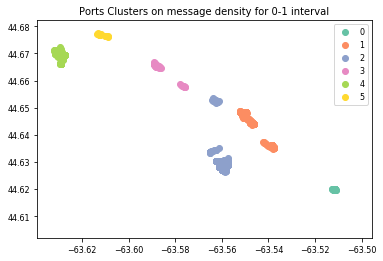

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Port and Cluster labels for interval are as below :
            intersected_port  Cluster_label
                   auto_port              0
                       po001              1
 southend container terminal              1
                pointpolygon              1
                    armament              1
                waterfront h              1
             south_enterance              2
               Fairview cove              3
                       port2              4
                       port1              1
            oulier_maybecday              1
                       port7              1


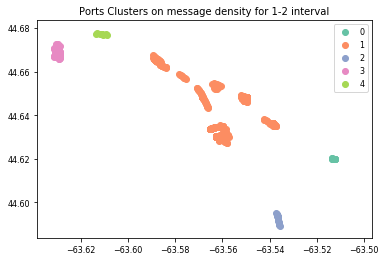

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Port and Cluster labels for interval are as below :
            intersected_port  Cluster_label
                       po001              0
 southend container terminal              1
                    armament              2
             south_enterance             -1
               Fairview cove              3
                pointpolygon              2
            oulier_maybecday              0
                       port7              0
                         ind              0


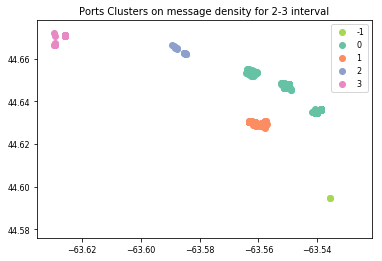

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Port and Cluster labels for interval are as below :
            intersected_port  Cluster_label
                       po001              0
                         ind              0
 southend container terminal              1
                    armament              2
               Fairview cove              3
                       port2             -1
            oulier_maybecday             -1
                       port7              0


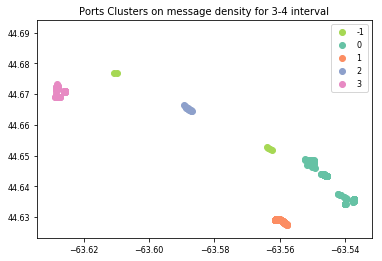

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Port and Cluster labels for interval are as below :
 intersected_port  Cluster_label
            po001              0
              ind              0
     pointpolygon              1
         armament              1
    Fairview cove              2
            port2              3
 oulier_maybecday              4
            port7              0


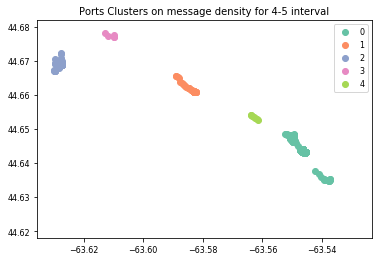

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Port and Cluster labels for interval are as below :
            intersected_port  Cluster_label
                       po001              0
                         ind              0
                       port7              0
 southend container terminal              0
                pointpolygon              1
               Fairview cove              2
                       port2             -1
            oulier_maybecday              3


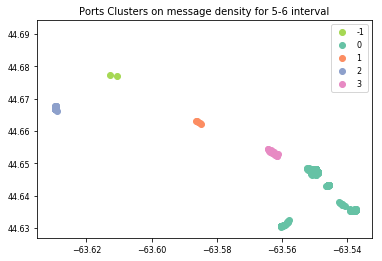

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Port and Cluster labels for interval are as below :
            intersected_port  Cluster_label
                         ind              0
                       port7              0
 southend container terminal              1
                    armament              2
               Fairview cove              3
                       port2              4
            oulier_maybecday              5


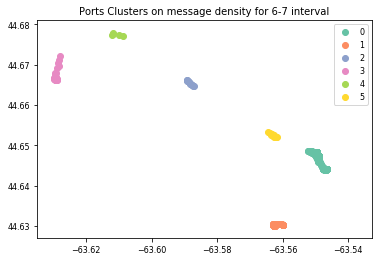

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Port and Cluster labels for interval are as below :
            intersected_port  Cluster_label
                         ind              0
 southend container terminal              1
                pointpolygon              2
                    armament              2
               Fairview cove              3
                       port2             -1
            oulier_maybecday              0
                       port7              0


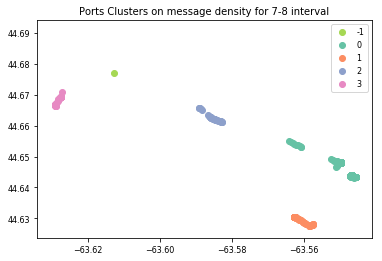

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Port and Cluster labels for interval are as below :
            intersected_port  Cluster_label
                       po001              0
                         ind              0
 southend container terminal              1
                pointpolygon              2
                    armament              2
                waterfront h              1
                       port1              1
                       port7              0


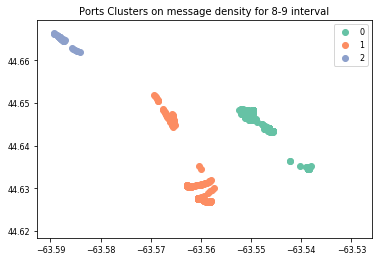

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Port and Cluster labels for interval are as below :
            intersected_port  Cluster_label
                   auto_port              0
                       po001              1
                         ind              1
 southend container terminal              2
                pointpolygon              3
                    armament              3
             south_enterance             -1
               Fairview cove              4
                       port2              5
                       port7              1


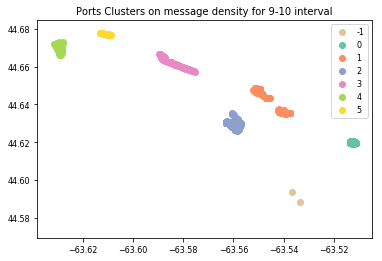

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Port and Cluster labels for interval are as below :
            intersected_port  Cluster_label
                   auto_port              0
                       po001              1
                         ind              1
 southend container terminal              1
                    armament              2
                        p010              3
               Fairview cove              3
                       port2              4
                pointpolygon              2
                waterfront h              1
            oulier_maybecday              1
                       port7              1


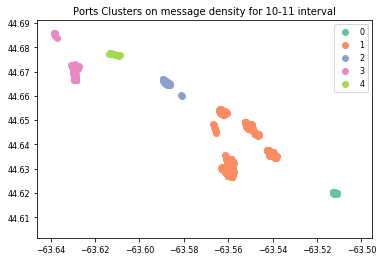

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Port and Cluster labels for interval are as below :
            intersected_port  Cluster_label
                         ind              0
 southend container terminal              0
                pointpolygon              0
                    armament              0
                        p010             -1
               Fairview cove              1
                       port2             -1
                waterfront h              0
                       port1              0
            oulier_maybecday              0
                       port7              0


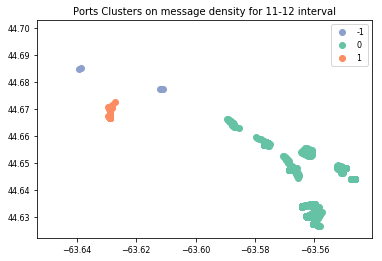

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Port and Cluster labels for interval are as below :
 intersected_port  Cluster_label
            po001              0
            port7              0
     pointpolygon              1
         armament              1
             p010             -1
    Fairview cove              2
            port2              3
 oulier_maybecday              4


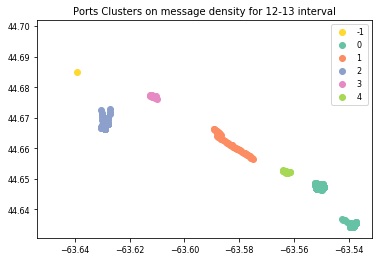

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Port and Cluster labels for interval are as below :
            intersected_port  Cluster_label
                   auto_port              0
                       po001              1
                         ind              1
 southend container terminal              1
                pointpolygon              2
                    armament              2
               Fairview cove              3
                       port2              4
            oulier_maybecday              1
                       port7              1


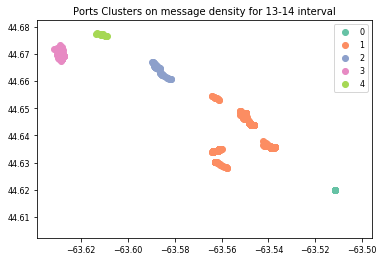

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Port and Cluster labels for interval are as below :
            intersected_port  Cluster_label
                   auto_port              0
                       po001              1
                         ind              1
 southend container terminal              1
                pointpolygon              1
                    armament              1
               Fairview cove              2
                       port2              3
                waterfront h              1
                       port1              1
            oulier_maybecday              1
                       port7              1


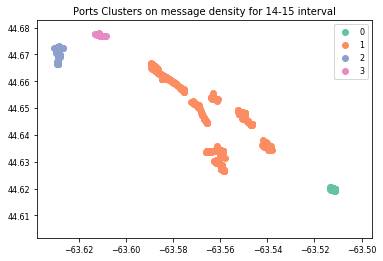

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Port and Cluster labels for interval are as below :
            intersected_port  Cluster_label
                   auto_port              0
                       po001              1
 southend container terminal              1
                pointpolygon              2
                    armament              2
               Fairview cove              3
                       port2              4
            oulier_maybecday              1
                       port7              1
                         ind              1


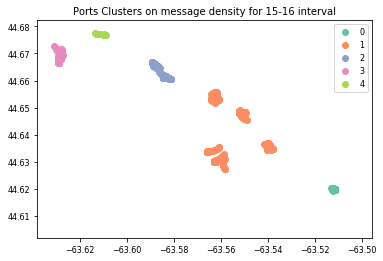

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Port and Cluster labels for interval are as below :
            intersected_port  Cluster_label
                   auto_port              0
                       po001              1
                         ind              1
                       port7              1
                    armament              2
 southend container terminal              1
                        p010              3
               Fairview cove              3
                       port2              4
                       po002              4
            oulier_maybecday              1


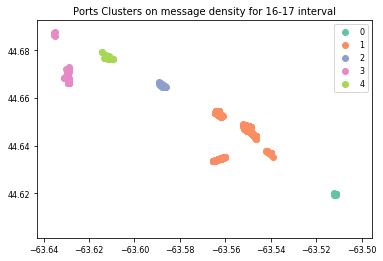

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Port and Cluster labels for interval are as below :
 intersected_port  Cluster_label
        auto_port              0
              ind              1
         armament              2
    Fairview cove              3
            port2              4
 oulier_maybecday              5
            port7              1


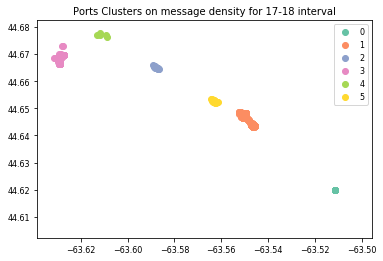

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Port and Cluster labels for interval are as below :
            intersected_port  Cluster_label
                   auto_port              0
                       po001              1
                         ind              1
 southend container terminal              2
                    armament              3
               Fairview cove              4
                       port2             -1
            oulier_maybecday              5
                       port7              1


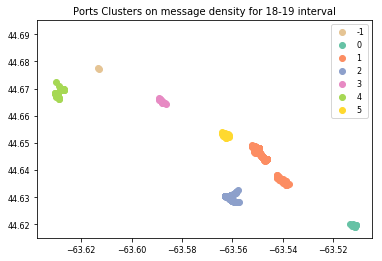

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Port and Cluster labels for interval are as below :
            intersected_port  Cluster_label
                   auto_port              0
                       po001              1
                         ind              1
 southend container terminal              1
                pointpolygon              2
                    armament              2
             south_enterance              3
               Fairview cove              4
                       port2              5
            oulier_maybecday              1
                waterfront h              1
                       port7              1


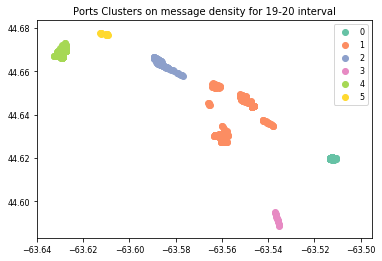

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Port and Cluster labels for interval are as below :
            intersected_port  Cluster_label
                   auto_port              0
                       po001              1
 southend container terminal              1
                pointpolygon              2
                    armament              2
             south_enterance             -1
               Fairview cove              3
                       port2              4
                waterfront h              1
            oulier_maybecday              1
                       port7              1


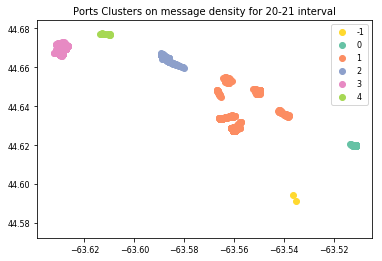

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Port and Cluster labels for interval are as below :
            intersected_port  Cluster_label
                   auto_port              0
                       po001              1
                         ind              1
 southend container terminal              1
                pointpolygon              2
                    armament              2
               Fairview cove              3
                       port2              4
                waterfront h              1
            oulier_maybecday              1
                       port7              1


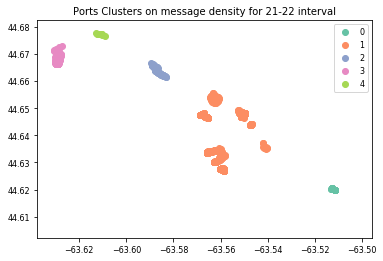

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Port and Cluster labels for interval are as below :
            intersected_port  Cluster_label
                   auto_port             -1
                       po001              0
                         ind              0
 southend container terminal              0
                    armament              1
               Fairview cove             -1
                       port2             -1
                waterfront h              0
            oulier_maybecday              0
                       port7              0


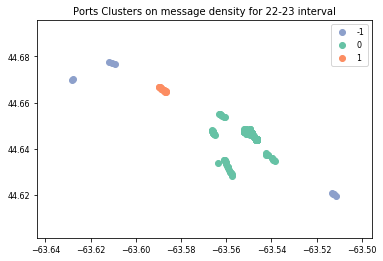

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Port and Cluster labels for interval are as below :
 intersected_port  Cluster_label
        auto_port              0
            po001              1
              ind              1
     pointpolygon              2
         armament              2
    Fairview cove              3
            port2              4
 oulier_maybecday              5
            port7              1


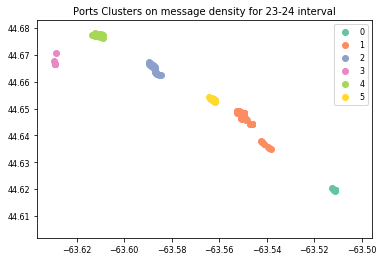

In [370]:
cluster_df = pd.DataFrame()
cluster_df['x']= gdf_inter.geometry.x
cluster_df['y']=gdf_inter.geometry.y
cluster_df['event_hours']=gdf_inter.event_hours
cluster_df['intersected_port']=gdf_inter.intersected_port

for h in range(24):
  sub_cluster_df = cluster_df[cluster_df['event_hours']==h]
  intervalDensityBasedClusterPlotter(h, sub_cluster_df)
  

## REFERENCES:
1. http://geopandas.org/mapping.html#choropleth-maps...
2. http://qingkaikong.blogspot.com/2016/08/clustering-with-dbscan.html
3. https://stackoverflow.com/questions/26139423/plot-different-color-for-different-categorical-levels-using-matplotlib
4. https://matplotlib.org/users/colormaps.html
5. https://geoffboeing.com/2014/08/clustering-to-reduce-spatial-data-set-size/
6. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
7. https://towardsdatascience.com/how-dbscan-works-and-why-should-i-use-it-443b4a191c80